## 1. 인공 신경망의 이해(Neural Network Overview)
---
우선 예제를 위해 사용될 인공 신경망을 소개한다. 역전파의 이해를 위해서 여기서 사용할 인공 신경망은 입력층, 은닉층, 출력층 이렇게 3개의 층을 가진다. 또한 해당 인공 신경망은 두 개의 입력과, 두 개의 은닉층 뉴런, 두 개의 출력층 뉴런을 사용한다. 은닉층과 출력층의 모든 뉴런은 활성화 함수로 시그모이드 함수를 사용한다.
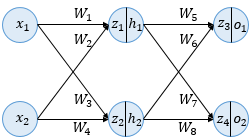
위의 그림은 여기서 사용할 인공 신경망의 모습을 보여준다. 은닉층과 출력층의 모든 뉴런에서 변수 z가 존재하는데 여기서 변수 z는 이전층의 모든 입력이 각각의 가중치와 곱해진 값들이 모두 더해진 가중합을 의미한다. 이 값은 뉴런에서 아직 시그모이드 함수를 거치지 않은 상태다. 즉, 활성화 함수의 입력을 의미한다.
z 우측의 |를 지나서 존재하는 변수 h 또는 o는 z가 시그모이드 함수를 지난 후의 값으로 각 뉴런의 출력값을 의미한다. 이번 역전파 예제에서는 인공 신경망에 존재하는 모든 가중치 W에 대해서 역전파를 통해 업데이트하는 것을 목표로 한다. 해당 인공 신경망은 편향 b를 고려하지 않는다.

## 2. 순전파(Forward Propagation)
---
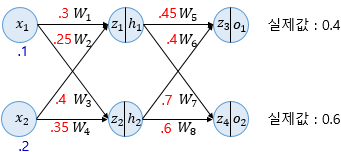
주어진 값이 위의 그림과 같을 때 순전파를 진행해본다. 위의 그림에서 소수점 앞의 0은 생략했다. 예를 들어 .25는 0.25를 의미한다. 파란색 숫자는 입력값을 의미하며, 빨간색 숫자는 각 가중치의 값을 의미한다. 앞으로 진행하는 계산의 결과값은 소수점 아래 여덟번째 자리까지 반올림하여 표기한다. <br><br>
각 입력은 입력층에서 은닉층 방향으로 향하면서 각 입력에 해당하는 가중치와 곱해지고, 결과적으로 가중합으로 계산되어 은닉층 뉴런의 시그모이드 함수의 입력값이 된다. z1과 z2는 시그모이드 함수의 입력으로 사용되는 각각의 값에 해당된다.
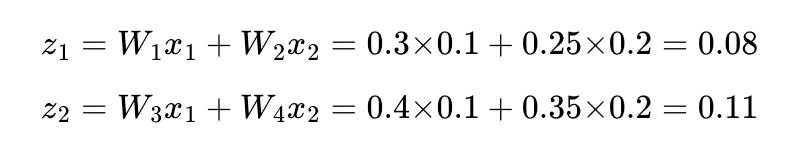
z1과 z2는 각각의 은닉층 뉴런에서 시그모이드 함수를 지나게 되는데 시그모이드 함수가 리턴하는 결과값은 은닉층 뉴런의 최종 출력값이다. 식에서는 각각 h1과 h2에 해당되며, 아래의 결과와 같다.
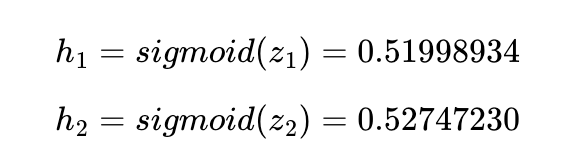
h1과 h2 이 두 값은 다시 출력층의 뉴런으로 향하게 되는데 이때 다시 각각의 값에 해당되는 가중치와 곱해지고, 다시 가중합 되어 출력층 뉴런의 시그모이드 함수의 입력값이 된다. 식에서는 각각 z3과 z4에 해당된다.
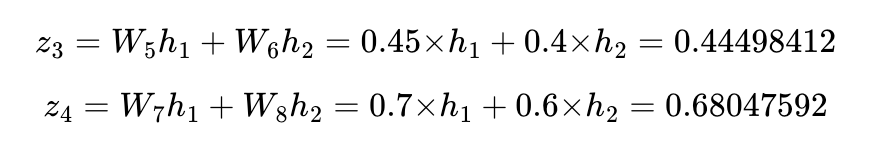
z3와 z4가 출력층 뉴런에서 시그모이드 함수를 지난 값은 이 인공 신경망이 최종적으로 계산한 출력값이다. 실제값을 예측하기 위한 값으로서 예측값이라고도 부른다.
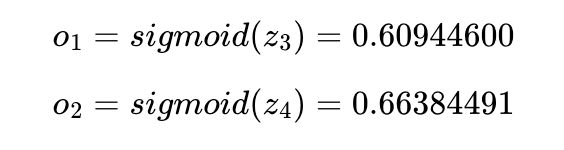
이제 해야할 일은 예측값과 실제값의 오차를 계산하기 위한 오차 함수를 선택하는 것이다. 오차(Error)를 계산하기 위한 손실 함수(Loss function)로는 평균 제곱 오차 MSE를 사용한다. 식에서는 실제값을 target이라고 표현했으며, 순전파를 통해 나온 예측값을 output으로 표현했다. 그리고 각 오차를 모두 더하면 전체 오차 E_total가 된다.
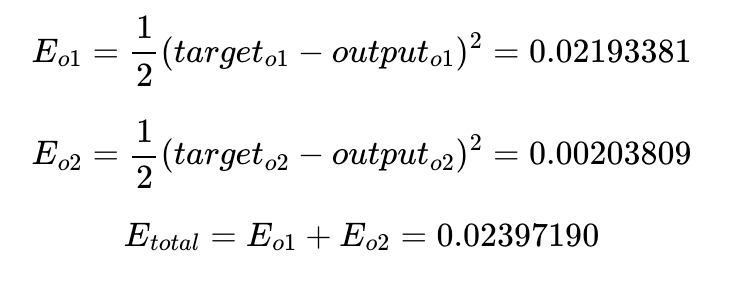

## 3. 역전파 1단계(BackPropagation Step 1)
---
순전파가 입력층에서 출력층으로 향한다면 역전파는 반대로 출력층에서 입력층 방향으로 계산하면서 가중치를 업데이트해간다. 출력층 바로 이전의 은닉층을 N층이라고 했을때, 출력층과 N층 사이의 가중치를 업데이트 하는 단계를 역전파 1단계, 그리고 N층과 N층의 이전층 사이의 가중치를 업데이트 하는 단계를 역전파 2단계라고 해본다.
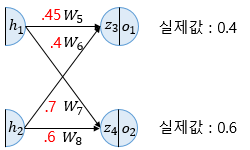
역전파 1단계에서 업데이트를 해야 할 가중치는 W5, W6, W7, W8 총 4개다. 원리 자체는 동일하므로 우선 W5에 대해서 먼저 업데이트를 진행해본다. 경사 하강법을 수행하려면 가중치 W5를 업데이트 하기 위해서 ∂E_total / ∂W5를 계산해야된다. 다음을 계산하기 위해 미분의 연쇄 법칙(Chain rule)에 따라서 이와 같이 풀어 쓸 수 있다.
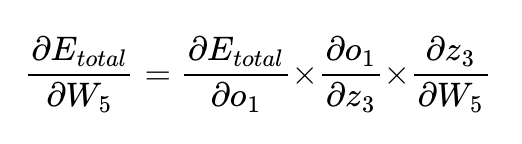
위의 식에서 우변의 세개의 각 항에 대해서 순서대로 계산해본다. 우선 첫번째 항에 대해서 계산해본다. 미분을 진행하기 전에 E_total의 값을 상기해본다. E_total은 앞서 순전파를 진행하고 계산했던 전체 오차값이다. 식은 다음과 같다.
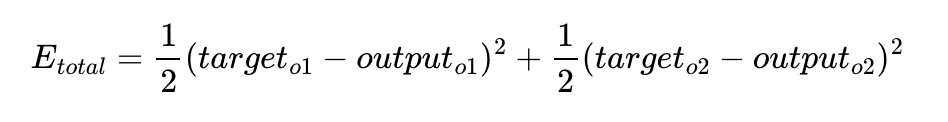
이에 ∂E_total / ∂o1는 다음과 같다.
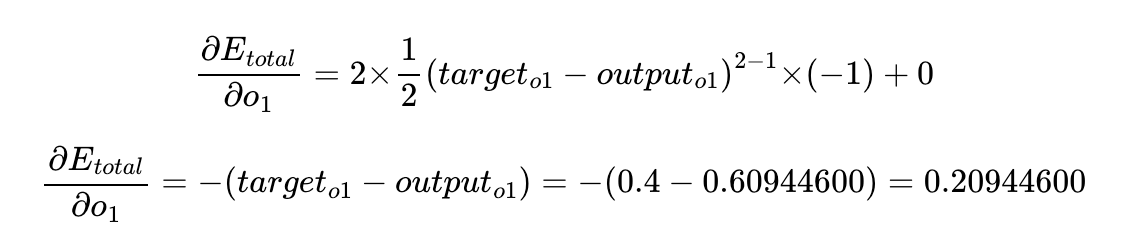
이제 두번째 항을 주목해본다. o1이라는 값은 시그모이드 함수의 출력값이다. 그런데 시그모이드 함수의 미분은 f(x) x (1 - f(x))다. 앞으로의 계산 과정에서도 계속해서 시그모이드 함수를 미분해야 하는 상황이 생기므로 기억해둔다. 이에 따라서 두번째 항의 미분 결과는 다음과 같다.
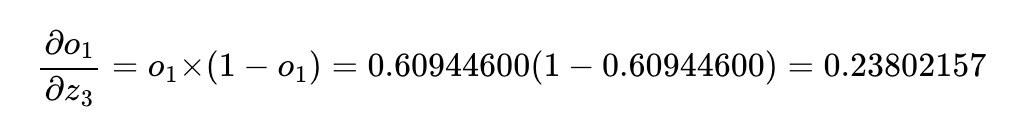
마지막으로 세번째 항은 h1의 값과 동일하다.
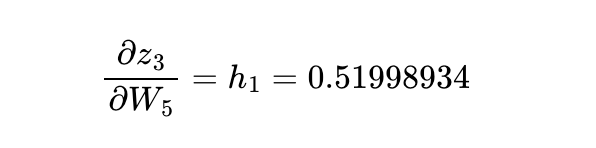
우변의 모든 항을 계산했다. 이제 이 값을 모두 곱해주면된다.
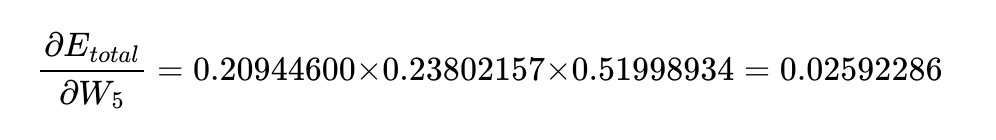
이제 앞서 배웠던 경사 하강법을 통해 가중치를 업데이트 할 때가 왔다. 하이퍼파라미터에 해당되는 학습률(learning rate) α는 0.5라고 가정한다.
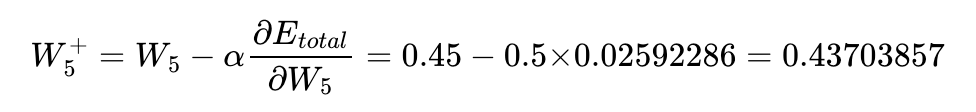
이와 같은 원리로 W6+, W7+, W8+을 계산할 수 있다.
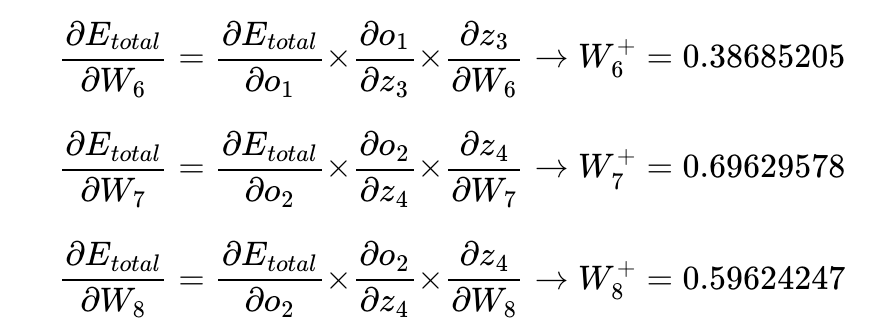

## 4. 역전파 2단계(BackPropagation Step 2)
---
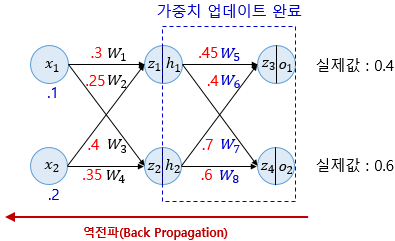
1단계를 완료했다면 이제 입력층 방향으로 이동하며 다시 계산을 이어간다. 위의 그림에서 빨간색 화살표는 순전파의 정반대 방향인 역전파의 방향을 보여준다.
현재 인공신경망은 은닉층 1개밖에 없으므로 이번 단계가 마지막 단계다.하지만 은닉층이 더 많은 경우라면 입력층 방향으로 한단계씩 계속해서 계산해가야한다.<br><br>
이번 단계에서 계산할 가중치는 W1, W2, W3, W4다. 원리 자체는 동일하므로 우선 W1에 대해서 업데이트를 진행해본다. 경사 하강법을 수행하려면 가중치 W1를 업데이트 하기 위해서 ∂E_total/∂W1 를 계산해야된다. <br><br>
∂E_total/∂W1를 계산하기 위해 미분의 연쇄 법칙에 따라서 이와 같이 풀어 쓸 수 있다.
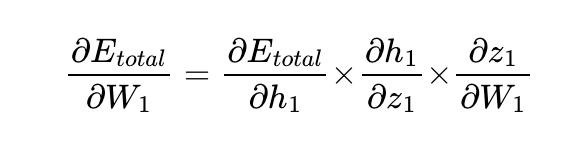
위의 식에서 우변의 첫번째항인 ∂E_total/∂h1는 다음과 같이 다시 식을 풀어서 쓸 수 있다.
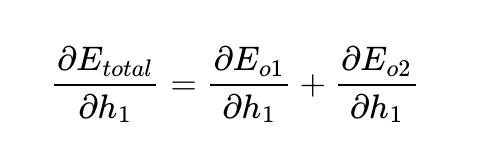
위의 식의 우변의 두항을 각각 구해본다. 우선 첫번째 항 ∂Eo1/∂h1에 대해서 항을 분해 및 계산해본다.
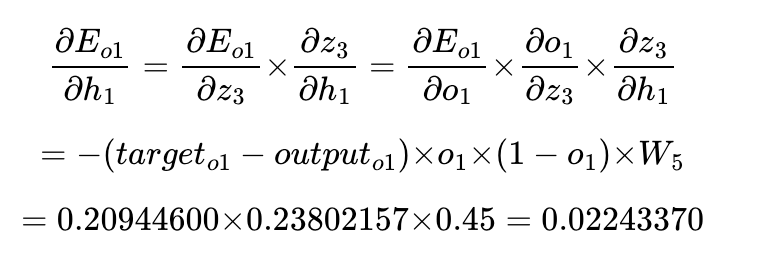
이와 같은 원리로 ∂Eo2/∂h1 또한 구한다.
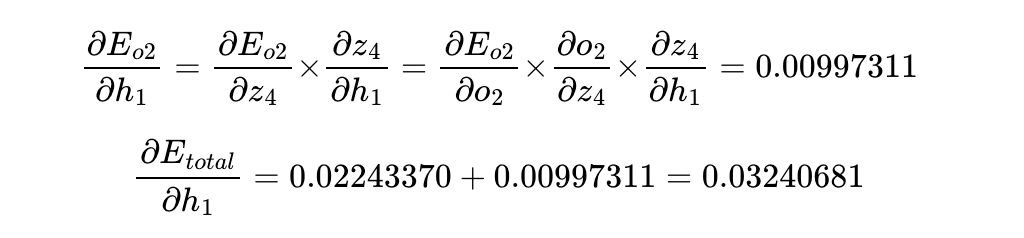
이제 ∂E_total/∂W1를 구하기 위해서 필요한 첫번째 항을 구했다. 나머지 두 항에 대해서 구해보도록한다.
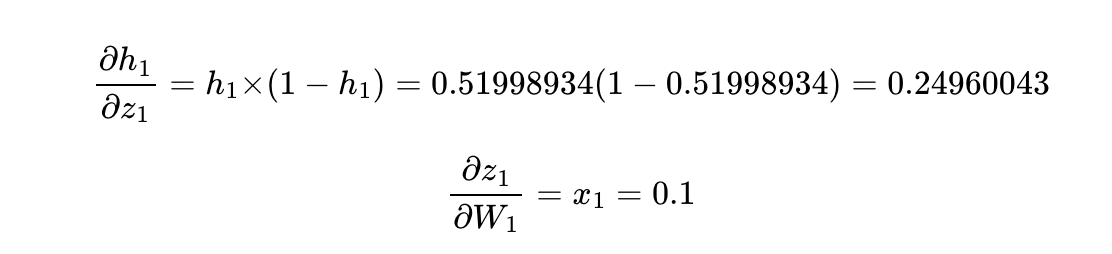
즉, ∂E_total/∂W1는 다음과 같다.
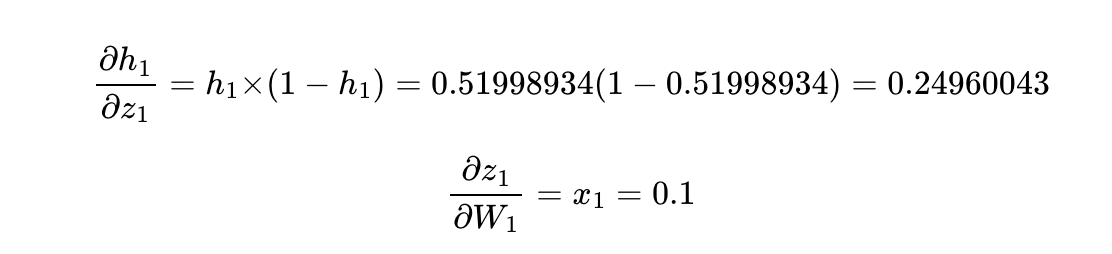
이제 앞서 배웠던 경사 하강법을 통해 가중치를 업데이트 할 수 있다.
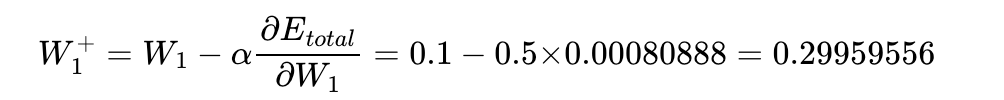
이와 같은 원리로 W2+, W3+, W4+를 계산할 수 있다.
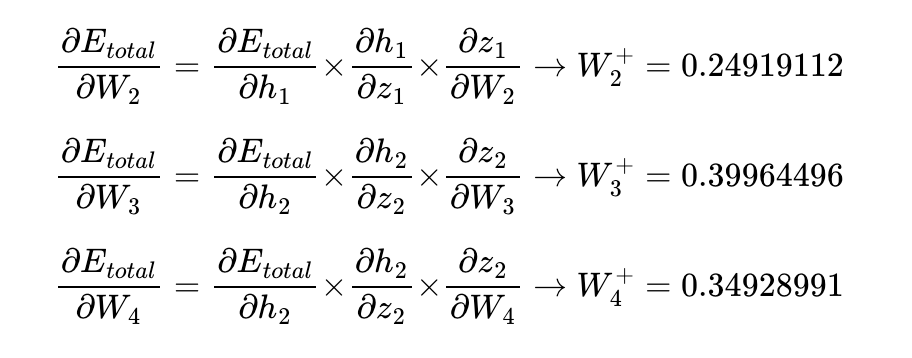

## 5. 결과 확인
---
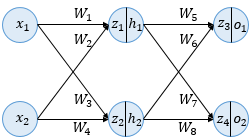
업데이트 된 가중치에 대해서 다시 한번 순전파를 진행하여 오차가 감소했는지 확인해본다.
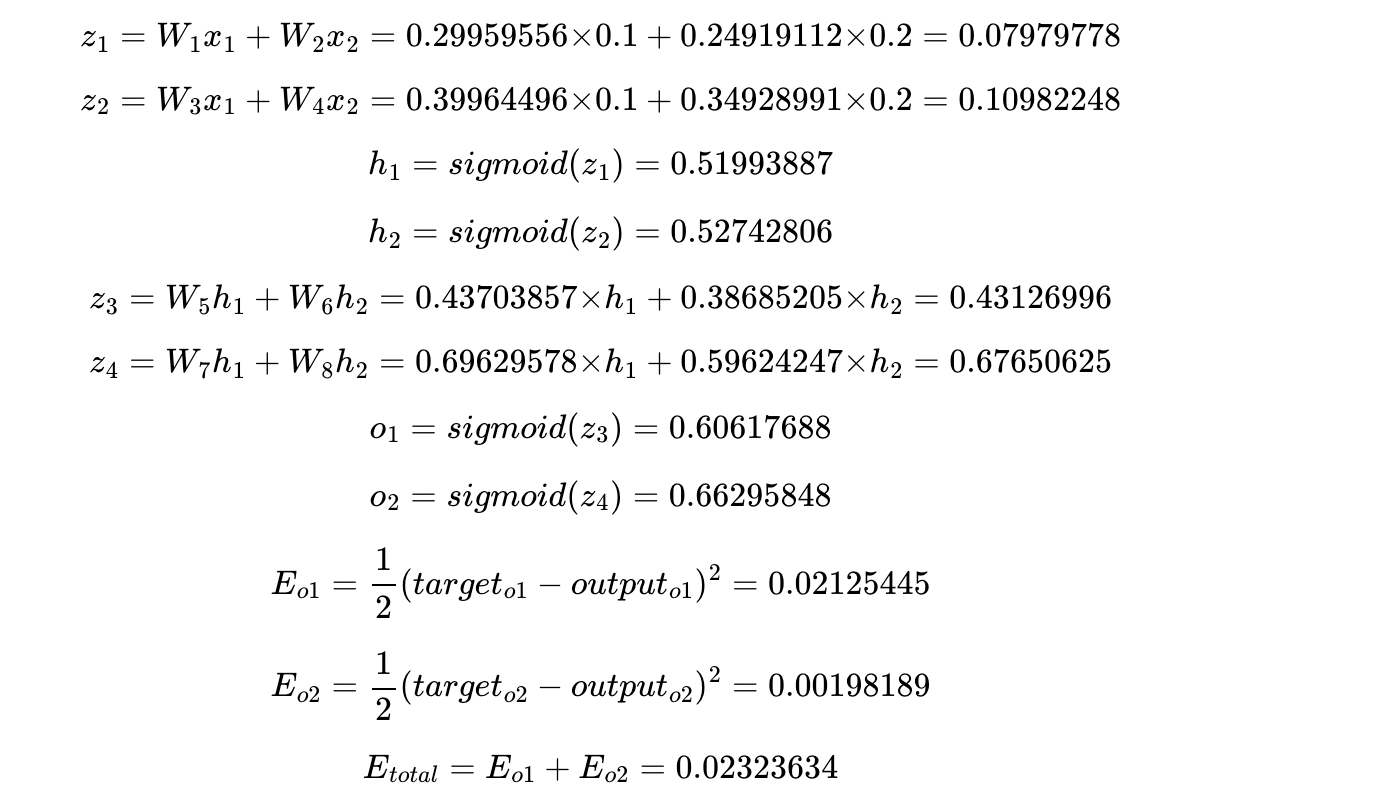
기존의 전체 오차 E_total가 0.02397190였으므로 1번의 역전파로 오차가 감소한 것을 확인할 수 있다. 인공 신경망의 학습은 오차를 최소화하는 가중치를 찾는 목적으로 순전파와 역전파를 반복하는 것을 말한다.